In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
dataset = pd.read_csv('Churn_Prediction_Preprocessed.csv')
dataset = pd.get_dummies(dataset, drop_first=True)

X = dataset.drop('churn_flag', axis=1)
y = dataset['churn_flag']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
models = {
    'Logistic': LogisticRegression(random_state=0),
    'SVM‑linear': SVC(kernel='linear', random_state=0),
    'SVM‑rbf': SVC(kernel='rbf', random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
}


In [6]:
def evaluate_pca_n(n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    accs = {}
    for name, clf in models.items():
        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)
        accs[name] = accuracy_score(y_test, y_pred)
    return accs

In [9]:
accuracies_n2 = evaluate_pca_n(1)

In [8]:
df = pd.DataFrame([accuracies_n2], index=['n=2'])
print(df)

     Logistic  SVM‑linear  SVM‑rbf    KNN  Naive Bayes  Decision Tree  \
n=2     0.924       0.924    0.924  0.915        0.923          0.833   

     Random Forest  
n=2          0.914  


In [10]:
df = pd.DataFrame([accuracies_n2], index=['n=1'])
print(df)

     Logistic  SVM‑linear  SVM‑rbf    KNN  Naive Bayes  Decision Tree  \
n=1     0.924       0.924    0.924  0.916        0.924          0.827   

     Random Forest  
n=1          0.844  


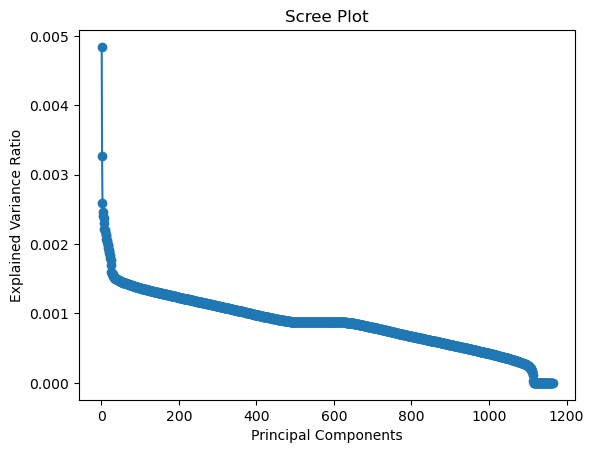

In [11]:
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24148\1376959882.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == label, 0],


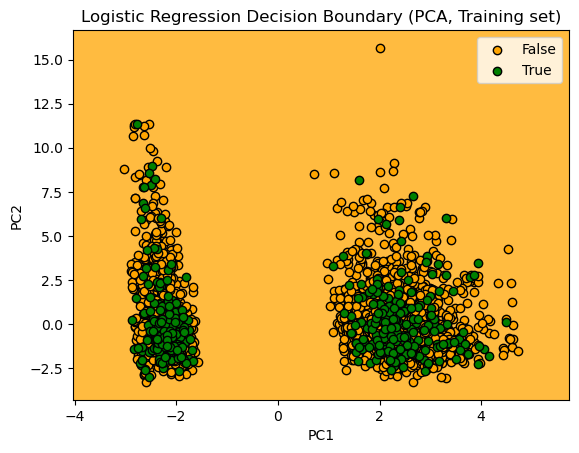

In [12]:
# Visualising the Training set resultsimport numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_vis = LogisticRegression(random_state=0)
clf_vis.fit(X_train_pca, y_train)

# Plot decision boundary
X_set, y_set = X_train_pca, y_train
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
xx1, xx2 = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

Z = clf_vis.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z,
             alpha=0.75,
             cmap=ListedColormap(('orange','green','yellow')))

plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, label in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == label, 0],
                X_set[y_set == label, 1],
                c=ListedColormap(('orange','green','yellow'))(idx),
                edgecolor='k', label=label)

plt.title('Logistic Regression Decision Boundary (PCA, Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_24148\1225394887.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0],


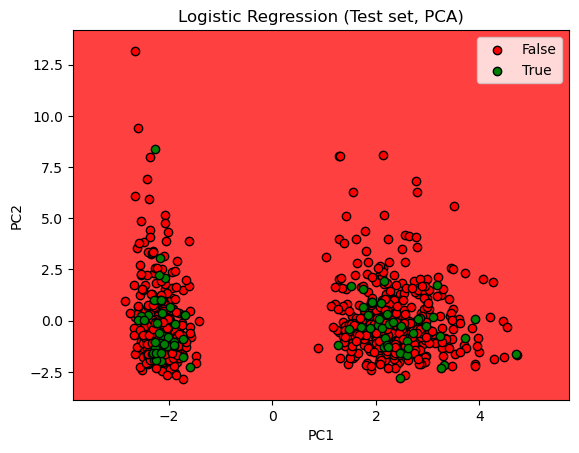

In [13]:
# Visualising the Test set results (PCA with 2 components)
from matplotlib.colors import ListedColormap

# Redo PCA to ensure consistent transformation
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the classifier
clf_vis = LogisticRegression(random_state=0)
clf_vis.fit(X_train_pca, y_train)

# Use the PCA-transformed test set for plotting
X_set, y_set = X_test_pca, y_test

# Create meshgrid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict and reshape for contour plot
Z = clf_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot decision regions
plt.contourf(X1, X2, Z,
             alpha=0.75,
             cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot test data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i),
                edgecolor='k', label=j)

plt.title('Logistic Regression (Test set, PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()